In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#reading the data

data = pd.read_csv("dataset.csv")
print(data.shape)

(70000, 785)


In [ ]:
#converting the pandas dataframe into an numpy array

data_np = data.to_numpy()

#extracting the X and y from the array

X = data_np[:, 1:]
y = data_np[:,0]

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [ ]:
#sigmoid and softmax activation function:

def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
  return np.exp(x - x.max())/np.sum(np.exp(x - x.max()))

def sigmoid_derivative(x):
  return x*(1-x)

In [ ]:
#one hot encoding of the y values

def one_hot(y):
  one_hot_y = np.zeros((y.shape[0], 10))
  for i in range(y.size):
    one_hot_y[i][y[i]] = 1

  return one_hot_y

In [ ]:
#categorical crossentropy loss funciton

def categorical_crossentropy(y, y_pred):
  n_samples = y.shape[0]
  e = 1e-10
  y_pred = np.clip(y_pred, e, 1-e)
  y_pred += 1e-9
  loss = -np.sum(y * np.log(y_pred))/n_samples

  return loss

In [ ]:
np.random.seed(9) # as the roll number is 009

parameters = {
    'layer1_w' : np.random.randn(784, 128),
    'layer1_b' : np.ones((1, 128)),

    'layer2_w' : np.random.randn(128, 64),
    'layer2_b' : np.ones((1,64)),

    'layer3_w' : np.random.randn(64,32),
    'layer3_b' : np.ones((1, 32)),

    'output_w' : np.random.randn(32,10),
    'output_b' : np.ones((1, 10))
}

In [ ]:
# function for forward propagation

def forward_prop(X, parameters):

  #first hidden layer
  Z1 = np.dot(X,parameters['layer1_w']) + parameters['layer1_b']
  A1 = sigmoid(Z1)

  #second hidden layer
  Z2 = np.dot(A1,parameters['layer2_w']) + parameters['layer2_b']
  A2 = sigmoid(Z2)

  #third hidden layer
  Z3 = np.dot(A2,parameters['layer3_w']) + parameters['layer3_b']
  A3 = sigmoid(Z3)

  #output layer
  Z4 = np.dot(A3,parameters['output_w']) + parameters['output_b']
  A4 = sigmoid(Z4)

  return {'A1': A1, 'A2': A2, 'A3': A3, 'A4': A4}

In [ ]:
#function to implement back propagation

def back_prop(parameters, activation, X, y):

  A1 = activation['A1']
  A2 = activation['A2']
  A3 = activation['A3']
  A4 = activation['A4']

  one_hot_y = one_hot(y)

  dZ4 =  A4 - one_hot_y
  dW4 = np.dot(A3.T, dZ4)
  dB4 = np.sum(dZ4, axis = 0, keepdims = True)

  dZ3 =  np.dot(dZ4, parameters['output_w'].T)*sigmoid_derivative(A3)
  dW3 = np.dot(A2.T, dZ3)
  dB3 = np.sum(dZ3, axis = 0, keepdims = True)

  dZ2 =  np.dot(dZ3, parameters['layer3_w'].T)*sigmoid_derivative(A2)
  dW2 = np.dot(A1.T, dZ2)
  dB2 = np.sum(dZ2, axis = 0, keepdims = True)

  dZ1 =  np.dot(dZ2, parameters['layer2_w'].T)*sigmoid_derivative(A1)
  dW1 = np.dot(X.T, dZ1)
  dB1 = np.sum(dZ1, axis = 0, keepdims = True)

  return dW1, dB1, dW2, dB2, dW3, dB3, dW4, dB4


In [ ]:
#gradient descent to update the parameters

def gradient_descent(parameters, X, y, dW1, dB1, dW2, dB2, dW3, dB3, dW4, dB4, alpha):
  parameters['layer1_w'] -= alpha*dW1
  parameters['layer1_b'] -= alpha*dB1
  parameters['layer2_w'] -= alpha*dW2
  parameters['layer2_b'] -= alpha*dB2
  parameters['layer3_w'] -= alpha*dW3
  parameters['layer3_b'] -= alpha*dB3
  parameters['output_w'] -= alpha*dW4
  parameters['output_b'] -= alpha*dB4

  return parameters

In [ ]:
#function for plotting the loss and accuracy

def plot_loss_and_accuracy(train_loss_list, train_accuracy_list, test_accuracy_list):
  #plotting the training loss
  plt.subplot(1,2,1)
  plt.plot(range(1, epochs + 1), train_loss_list, label='Training Loss')
  plt.title('Loss per Epoch')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  #Plotting the accuracy graph for train set and test set
  plt.subplot(1,2,2)
  plt.plot(range(1, epochs + 1), train_accuracy_list, label='Training Accuracy')
  plt.plot(range(1, epochs + 1), test_accuracy_list, label='Test Accuracy')
  plt.title('Accuracy per Epoch')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()

  plt.show()

Current train size 48999 samples & Test size 21001 samples:

Epoch 1 :: Train Loss : 0.8355 Train Accuracy : 79.78% 
accuracy on test data : 79.44%
Epoch 5 :: Train Loss : 0.4471 Train Accuracy : 84.92% 
accuracy on test data : 83.87%
Epoch 10 :: Train Loss : 0.3666 Train Accuracy : 86.95% 
accuracy on test data : 84.83%
Epoch 15 :: Train Loss : 0.3209 Train Accuracy : 88.43% 
accuracy on test data : 85.54%
Epoch 20 :: Train Loss : 0.2885 Train Accuracy : 89.16% 
accuracy on test data : 85.67%
Epoch 25 :: Train Loss : 0.2630 Train Accuracy : 89.65% 
accuracy on test data : 85.67%




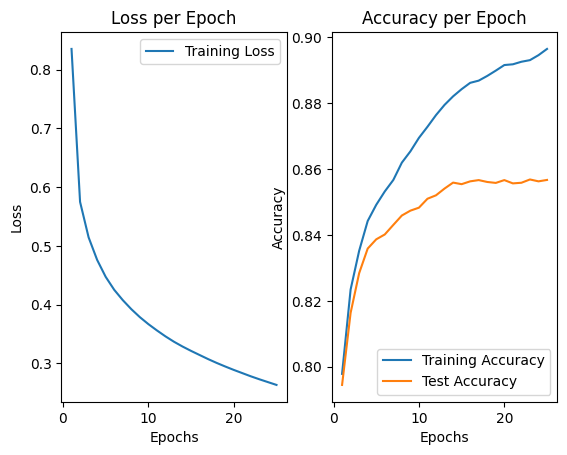

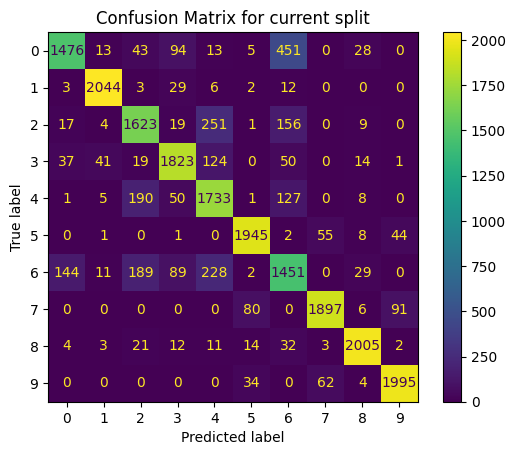


-------------------------------------------------------------------------------------

Current train size 56000 samples & Test size 14000 samples:

Epoch 1 :: Train Loss : 0.2882 Train Accuracy : 89.20% 
accuracy on test data : 85.53%
Epoch 5 :: Train Loss : 0.2619 Train Accuracy : 89.87% 
accuracy on test data : 86.06%
Epoch 10 :: Train Loss : 0.2411 Train Accuracy : 90.23% 
accuracy on test data : 85.94%
Epoch 15 :: Train Loss : 0.2253 Train Accuracy : 90.48% 
accuracy on test data : 86.08%
Epoch 20 :: Train Loss : 0.2118 Train Accuracy : 90.94% 
accuracy on test data : 86.45%
Epoch 25 :: Train Loss : 0.2006 Train Accuracy : 91.41% 
accuracy on test data : 86.44%




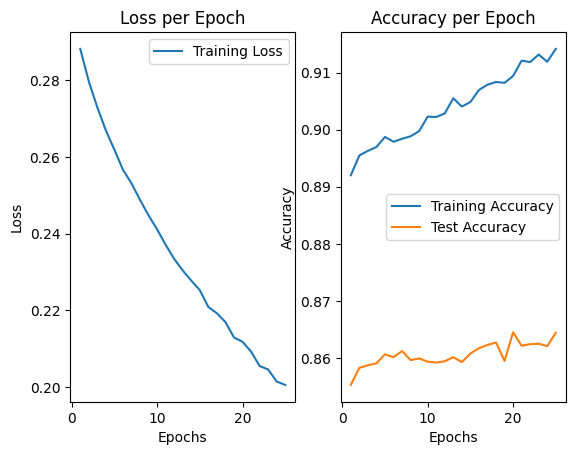

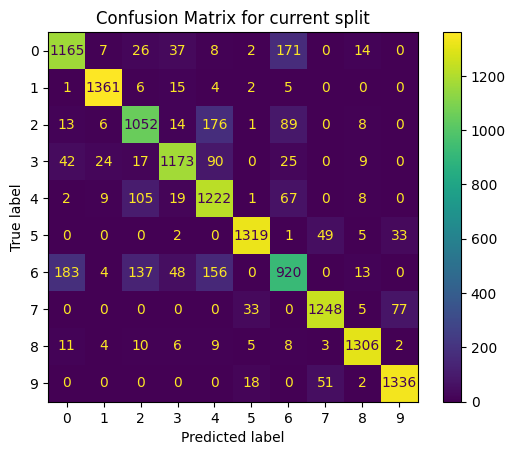


-------------------------------------------------------------------------------------

Current train size 63000 samples & Test size 7000 samples:

Epoch 1 :: Train Loss : 0.2377 Train Accuracy : 90.97% 
accuracy on test data : 86.46%
Epoch 5 :: Train Loss : 0.2159 Train Accuracy : 91.37% 
accuracy on test data : 86.64%
Epoch 10 :: Train Loss : 0.1984 Train Accuracy : 90.43% 
accuracy on test data : 85.36%
Epoch 15 :: Train Loss : 0.1862 Train Accuracy : 91.81% 
accuracy on test data : 86.37%
Epoch 20 :: Train Loss : 0.1825 Train Accuracy : 92.15% 
accuracy on test data : 86.60%
Epoch 25 :: Train Loss : 0.1718 Train Accuracy : 92.39% 
accuracy on test data : 86.66%




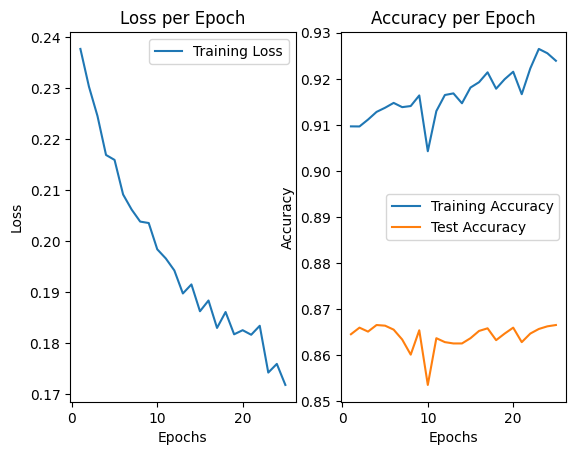

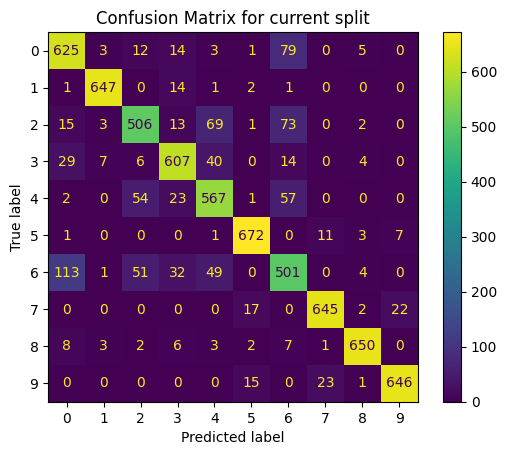


-------------------------------------------------------------------------------------



In [ ]:
train_size = [.7,.8,.9]
epochs = 25
batch = 23
alpha = 0.01

for i in train_size:

  #lists to hold the losses and accuracies over 25 epochs
  train_loss_list = []
  train_accuracy_list = []
  test_accuracy_list = []

  #Getting the train test split for the current values
  X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 1-i,random_state=9)

  # Preprocessing the data for easier calculation
  X_train = X_train / 255
  X_test = X_test / 255

  print(f'Current train size {X_train.shape[0]} samples & Test size {X_test.shape[0]} samples:\n')

  for epoch in range(epochs):
        train_loss = 0
        for i in range(0, X_train.shape[0], batch):
            # Mini-batch
            x_temp = X_train[i:i + batch]
            y_temp = y_train[i:i + batch]

            #print(x.shape, y.shape)

            # Forward propagation
            activations = forward_prop(x_temp, parameters)
            y_pred = activations['A4']
            #print(y_pred.shape)

            # Compute loss
            loss = categorical_crossentropy(one_hot(y_temp), y_pred)
            train_loss += loss

            # Backward propagation
            dW1, dB1, dW2, dB2, dW3, dB3, dW4, dB4 = back_prop(parameters, activations, x_temp, y_temp)
            # Update parameters
            parameters = gradient_descent(parameters, X, y, dW1, dB1, dW2, dB2, dW3, dB3, dW4, dB4, alpha)

        # Compute training loss and accuracy
        train_loss /= (X_train.shape[0] // batch)
        train_loss_list.append(train_loss)

        activation_train = forward_prop(X_train, parameters)
        y_pred_train = activation_train['A4']

        train_accuracy = np.sum(np.argmax(y_pred_train, axis=1) == np.argmax(one_hot(y_train), axis=1)) / y_train.shape[0]
        train_accuracy_list.append(train_accuracy)

        # getting accuracy on test set using forward propagation
        activation_test = forward_prop(X_test, parameters)
        y_pred_test = activation_test['A4']

        test_accuracy = np.sum(np.argmax(y_pred_test, axis=1) == np.argmax(one_hot(y_test), axis=1)) / y_test.shape[0]
        test_accuracy_list.append(test_accuracy)

        # Print the results after each epoch
        if((epoch+1)%5 == 0 or epoch == 0):
          print(f'Epoch {epoch + 1} :: Train Loss : {train_loss:.4f} Train Accuracy : {train_accuracy * 100:.2f}% \naccuracy on test data : {test_accuracy*100:.2f}%')
  print('\n')
  plot_loss_and_accuracy(train_loss_list, train_accuracy_list, test_accuracy_list)
  print('\n')

  #printing the confusion matrix for the test dataset
  confusion_mat = confusion_matrix(np.argmax(one_hot(y_test), axis=1),np.argmax(y_pred_test, axis=1))
  display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat)
  display.plot()
  plt.title('Confusion Matrix for current split')
  plt.show()
  print('\n-------------------------------------------------------------------------------------\n')
